In [65]:
#라이브 불러오기
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, mean_absolute_error, r2_score

In [4]:
#데이터 불러오기
data = pd.read_csv("C:/Users/LIM/OneDrive - gachon.ac.kr/바탕 화면/study/인공지능개론/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#데이터 확인
print(data.columns.tolist())  #컬럼명 확인
data.dtypes            #데이터 타입 확인

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
#불필요한 데이터 제거
data = data.drop(columns=['id', 'date', 'zipcode']) 

In [12]:
#결측치 제거
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

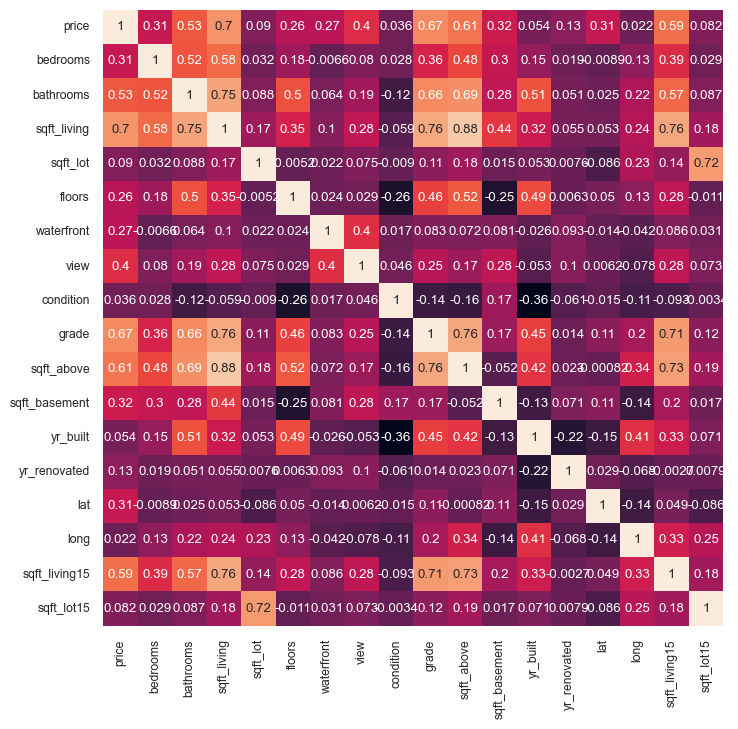

In [20]:
#상관관계 행렬
#0.3이상일 시 상관관계, 0.7이상일시 매우높음.
data_corr = data.corr()

# heatmap
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [22]:
#입력값(X)과 출력값(y) 분리
X = data.drop('price', axis=1) #price 빼고 저장
y = data['price'].astype(int) - 1 #pirce만 정수형으로 변환 후 -1하고 저장

In [24]:
#데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  #데이터 분할 확인

((17290, 17), (4323, 17), (17290,), (4323,))

In [30]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [32]:
y

0        221899
1        537999
2        179999
3        603999
4        509999
          ...  
21608    359999
21609    399999
21610    402100
21611    399999
21612    324999
Name: price, Length: 21613, dtype: int32

In [36]:
#딥러닝 모델 구성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),             
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

#모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#모델 학습
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

model.summary()

C:\Users\Lim\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 422351306752.0000 - mae: 534793.8750 - val_loss: 337407606784.0000 - val_mae: 492889.2500
Epoch 2/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 296939716608.0000 - mae: 435020.0938 - val_loss: 88584839168.0000 - val_mae: 229829.9062
Epoch 3/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 81987608576.0000 - mae: 213127.2812 - val_loss: 64105443328.0000 - val_mae: 189591.0625
Epoch 4/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 64822882304.0000 - mae: 184848.1875 - val_loss: 56771731456.0000 - val_mae: 177469.6719
Epoch 5/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 54891782144.0000 - mae: 169922.7344 - val_loss: 52059533312.0000 - val_mae: 168512.0000
Epoch 6/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 53514309632.0000 - mae: 163689.5938 - val_loss: 47588466688.0000 - val_mae: 159213.3125
Epoch 7/30
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 49082802176.0000 - mae: 154343.7344 - val_loss: 4

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,333 (44.27 KB)

 Trainable params: 3,777 (14.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,556 (29.52 KB)

In [50]:
y_pred = model.predict(X_test).flatten()

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [52]:
#평가 지표 출력
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 114692.32644430951
MSE: 37637830659.32307
R² Score: 0.7510342001914978


In [62]:
#예측 예시
y_pred = pd.Series(model.predict(X_test[:3]).ravel())
for i in range(3):
    print(f"실제 가격 : {y_test.iloc[i]:,.0f}원, 예측 가격 : {y_pred[i]:,.0f}원")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
실제 가격 : 364,999원, 예측 가격 : 386,469원
실제 가격 : 864,999원, 예측 가격 : 855,943원
실제 가격 : 1,037,999원, 예측 가격 : 1,266,271원
